<a href="https://colab.research.google.com/github/krimerwool/Ai_ResearchPaper_Sarthak/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCK HEADLINES DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
#preprocessing started
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Stock Headlines.csv', encoding = 'ISO-8859-1')

In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [ ]:
df.shape

(4101, 27)

In [ ]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

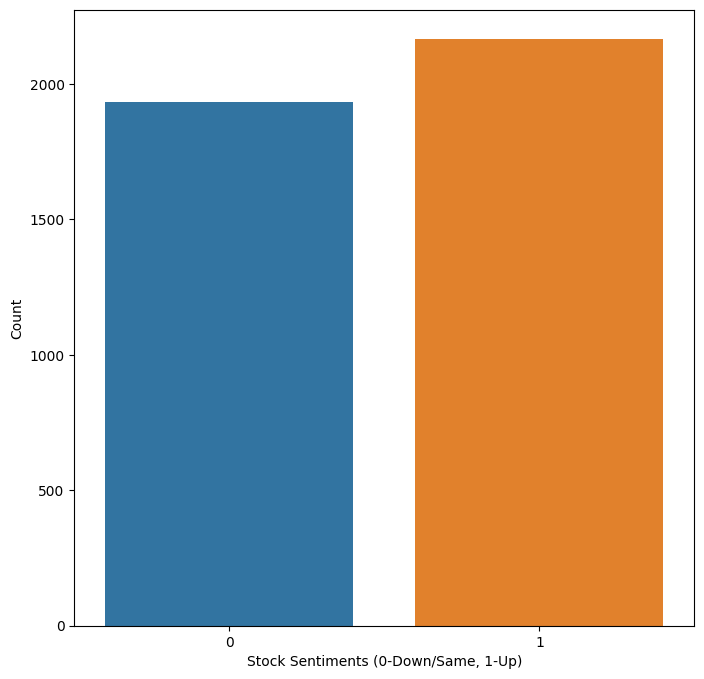

In [ ]:
# Visualizing the count of 'Label' column from the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [ ]:
print(df.shape)

(4101, 27)


In [ ]:
# Finding any Null values
# filtering record
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [ ]:
# Dropping Null values
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.reset_index(inplace=True)

In [ ]:
# Splitting the dataset into train and test set
#modelling started
# records in training should be greater than testing
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 28), Test size: (378, 28)


In [ ]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [ ]:
# Splitting the dataset
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [ ]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [ ]:
# Renaming columns
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [ ]:
# Converting the entire text to lower case
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [ ]:
# Joining all the columns
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [ ]:
train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [ ]:
test_headlines[0]

'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

In [ ]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):

  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [ ]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):

  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [ ]:
train_corpus[0:10]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

In [ ]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [ ]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

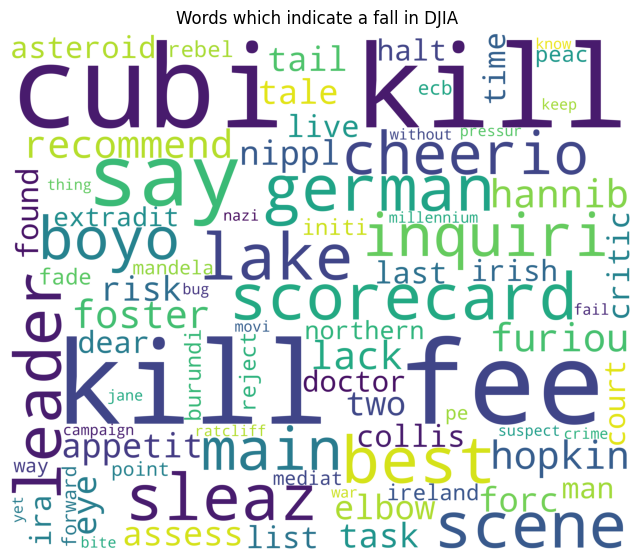

In [ ]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

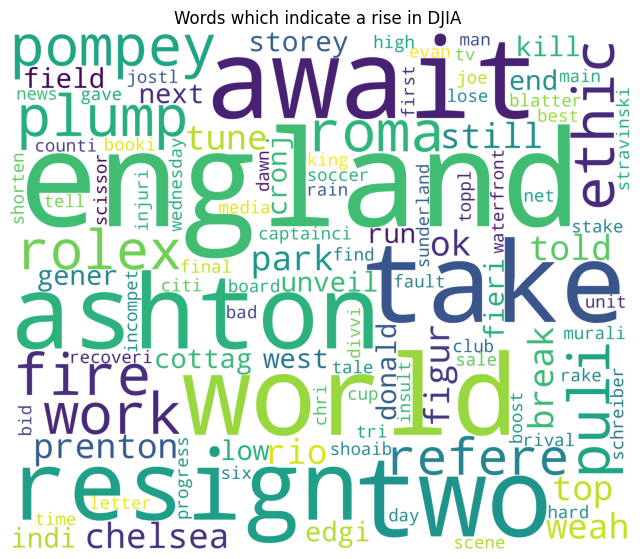

In [ ]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [ ]:
X_test = cv.transform(test_corpus).toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
rf_y_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.39%
Precision score is: 0.83
Recall score is: 0.87


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier object
nb_clf = GaussianNB()

# Fit the classifier to the training data
nb_clf.fit(X_train, y_train)

GaussianNB()

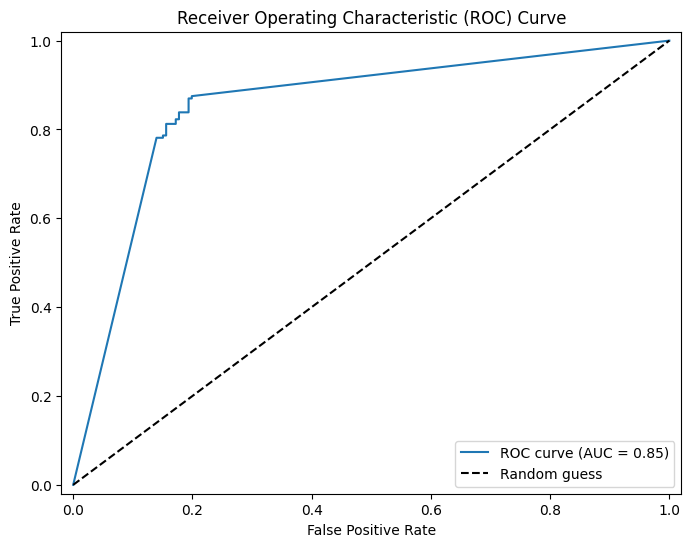

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
nb_y_prob = nb_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [ ]:
rf_cm

array([[152,  34],
       [ 25, 167]])

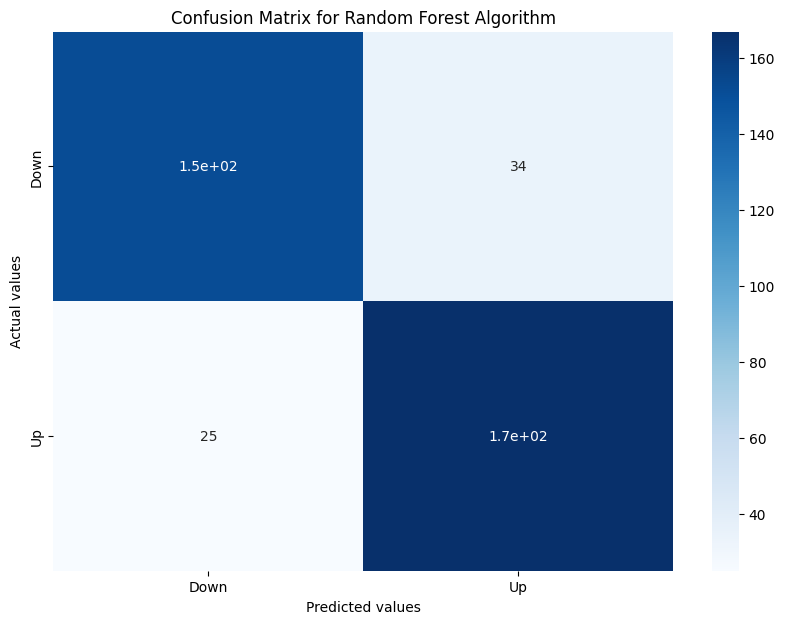

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()
# top left true pos bottom left false pos top right false neg bottom right true negative

In [ ]:
# multinomial import for gausssian model
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


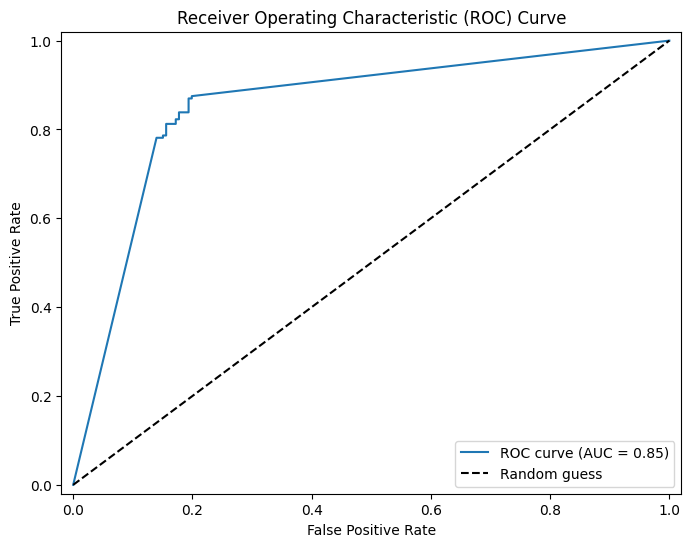

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
nb_y_prob = nb_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_y_prob)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [ ]:
nb_cm

array([[158,  28],
       [ 33, 159]])

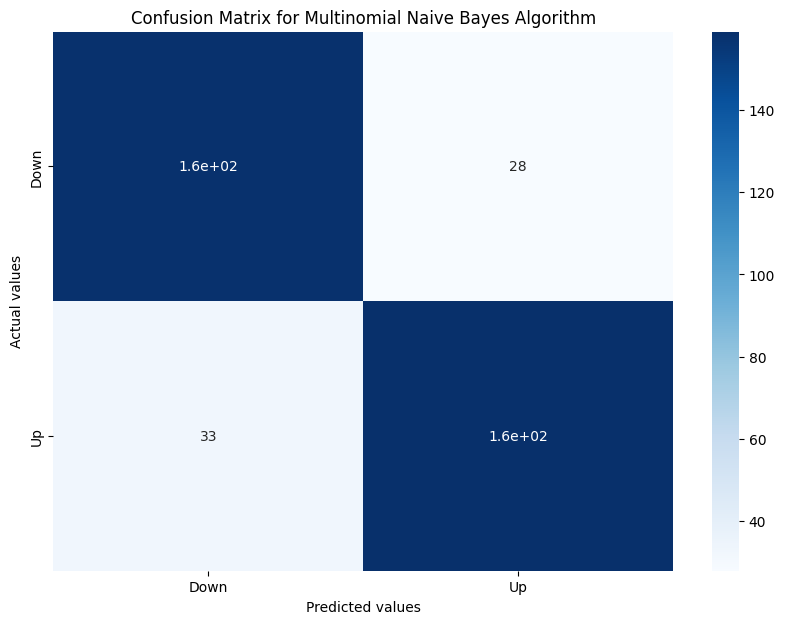

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return rf_classifier.predict(temp)

In [ ]:
# For generating random integer
from random import randint

In [ ]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [ ]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Canada's move to legalize marijuana would be the most high-profile rebuke of international drug treaties to date, exposing "a huge hole in the treaties, making more nations comfortable with the idea of legalization."
Prediction: The stock price will remain the same or will go down.


In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Efficiency up, turnover down: Sweden experiments with six-hour working day | World news | The Guardian
Prediction: The stock price will remain the same or will go down.


In [ ]:
# Predicting values
sample_news = 'COVID-19 sudden spike in death encountered'

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: COVID-19 sudden spike in death encountered
Prediction: The stock price will remain the same or will go down.


In [ ]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Martin Schkreli - Turing CEO who increased the price of Aids drug by 5000% - has been arrested
Prediction: The stock price will remain the same or will go down.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Install transformers library
!pip install transformers
# Install skfuzzy library
!pip install scikit-fuzzy
# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import skfuzzy as fuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=1243d67114c5bbe04763ded60f747556f39de8230521d981566b92ea2ebb6049
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Preprocess the headlines
test_headlines = []
for row in range(0,len(df.index)):
    test_headlines.append(' '.join(str(x) for x in df.iloc[row,2:27]))

In [ ]:
# Create a corpus of the test dataset
test_corpus = []
for i in range(0, len(test_headlines)):
    words = test_headlines[i].split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    headline = ' '.join(words)
    test_corpus.append(headline)

In [ ]:
# Add the preprocessed headlines to the test dataframe
df['preprocessed_headlines'] = test_corpus

In [ ]:
# Sentiment analysis using BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

sentiments = []
for headline in df['preprocessed_headlines']:
    inputs = tokenizer(headline,
                       padding=True,
                       truncation=True,
                       max_length=128,
                       return_tensors='pt').to(device)
    outputs = model(**inputs)
    prediction = torch.softmax(outputs.logits, dim=1).detach().cpu().numpy()[0]
    sentiments.append(prediction[1] - prediction[0])  # Positive sentiment - Negative sentiment

df['sentiment_score'] = sentiments

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Make predictions using the stock_prediction function
predictions = []
for i in range(len(df)):
    if i == 2389  or i==2460 or i==2793:
        continue
    sample_news = df['preprocessed_headlines'][i]
    stock_prediction_result = stock_prediction(sample_news)
    predictions.append(stock_prediction_result)

In [ ]:
# Add the predictions to the test dataframe, excluding the last three rows
df = df.iloc[:-3] # This removes the last three rows from the dataframe
df['predicted_label'] = predictions

<ipython-input-64-5b8d1d35a5ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_label'] = predictions


In [ ]:
from textblob import TextBlob
# Convert bytes to strings and remove leading "b'" characters
df.iloc[:, 2:27] = df.iloc[:, 2:27].applymap(lambda x: x.strip("b'").strip("'"))


# Combine the headlines for each day into a single string
df["combined_headlines"] = df.iloc[:, 2:27].apply(lambda x: " ".join(x), axis=1)

# Calculate sentiment score for each day's combined headlines
df["sentiment_score"] = df["combined_headlines"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Drop the original "Top1" to "Top25" columns
df = df.drop(columns=df.columns[2:27])

# Save the preprocessed data
df.to_csv("preprocessed_data.csv", index=False)

In [ ]:
# Split the data into training and testing sets
X = df[['sentiment_score']]
y = df['sentiment_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a linear regression model on the training data
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = reg.predict(X_test_scaled)

In [ ]:
# Evaluate the model's performance using various metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.8171255355242766e-17
Mean Squared Error: 2.0135524794779885e-33
Root Mean Squared Error: 4.487262505668672e-17
R2 Score: 1.0


In [ ]:
# Define the fuzzy sets and their membership functions
x = np.arange(0, 11, 1)
mf_low = fuzz.trimf(x, [0, 0, 5])
mf_high = fuzz.trimf(x, [5, 10, 10])

In [ ]:
# Calculate the membership values for each data point in the training set
low_membership = fuzz.interp_membership(x, mf_low, X_train_scaled[:, 0])
high_membership = fuzz.interp_membership(x, mf_high, X_train_scaled[:, 0])

# Use the membership values to create a fuzzy model
fuzzy_model = np.zeros_like(X_train_scaled[:, 0])
fuzzy_model[low_membership > 0] = 1
fuzzy_model[high_membership > 0] = 2

In [ ]:
# Define the range of values over which the membership functions are defined
x = np.arange(0, 11, 1)

# Define the degree of membership for each value in the range for the two classes
mf_low = fuzz.trimf(x, [0, 0, 5])
mf_high = fuzz.trimf(x, [5, 10, 10])

# Combine the membership functions into a single fuzzy set
fuzzy_model = np.fmax(mf_low, mf_high)

# Use the fuzzy model to make predictions for the test set
y_pred = fuzz.defuzz(x, fuzzy_model, mode='centroid')

In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Preprocess the data
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
y = np.where(y == 'positive', 1, 0)
from tensorflow.keras.models import Sequential

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<ipython-input-75-c86ddc70778b>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y = np.where(y == 'positive', 1, 0)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Preprocess the data
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

# Convert the labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)# Train the neural network
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the neural network
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
103/103 - 9s - loss: 0.3153 - accuracy: 0.0034 - val_loss: 0.1599 - val_accuracy: 0.0049 - 9s/epoch - 91ms/step
Epoch 2/10
103/103 - 0s - loss: 0.1239 - accuracy: 0.0034 - val_loss: 0.0984 - val_accuracy: 0.0049 - 376ms/epoch - 4ms/step
Epoch 3/10
103/103 - 0s - loss: 0.0589 - accuracy: 0.0034 - val_loss: 0.0246 - val_accuracy: 0.0049 - 359ms/epoch - 3ms/step
Epoch 4/10
103/103 - 0s - loss: -8.7853e-02 - accuracy: 0.0034 - val_loss: -1.8181e-01 - val_accuracy: 0.0049 - 358ms/epoch - 3ms/step
Epoch 5/10
103/103 - 0s - loss: -4.9337e-01 - accuracy: 0.0034 - val_loss: -7.3889e-01 - val_accuracy: 0.0049 - 368ms/epoch - 4ms/step
Epoch 6/10
103/103 - 0s - loss: -1.4512e+00 - accuracy: 0.0034 - val_loss: -1.9359e+00 - val_accuracy: 0.0049 - 349ms/epoch - 3ms/step
Epoch 7/10
103/103 - 0s - loss: -3.2257e+00 - accuracy: 0.0034 - val_loss: -4.0029e+00 - val_accuracy: 0.0049 - 361ms/epoch - 4ms/step
Epoch 8/10
103/103 - 0s - loss: -6.2586e+00 - accuracy: 0.0034 - val_loss: -7.3869e+00 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Initialize the DataFrame
df = pd.DataFrame({
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'preprocessed_headlines': ['headline 1', 'headline 2', 'headline 3'],
    'col1': ['A', 'B', 'C'],
    'col2': ['X', 'Y', 'Z'],
    'col3': [True, False, True],
    'numerical_col1': [1, 2, 3],
    'numerical_col2': [4, 5, 6],
    'sentiment_score': [0.2, 0.7, 0.8]
})

# Preprocess the date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Preprocess the input data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['preprocessed_headlines'])
X = tokenizer.texts_to_sequences(df['preprocessed_headlines'])
max_seq_len = max([len(x) for x in X])
X = pad_sequences(X, padding='post', maxlen=max_seq_len)

# Define categorical columns
categorical_cols = ['col1', 'col2', 'col3']

# Encode categorical variables to numeric values
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# Scale numerical variables
numerical_cols = ['numerical_col1', 'numerical_col2']
if all(col in df.columns for col in numerical_cols):
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
else:
    # Add columns with default values if they don't exist in the DataFrame
    df['numerical_col1'] = 0
    df['numerical_col2'] = 0
    numerical_cols = ['numerical_col1', 'numerical_col2']
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split data into X and y
X_numerical = df[numerical_cols].values
X_categorical = df[categorical_cols].values
X = np.hstack((X, X_numerical, X_categorical))
y_true = df['sentiment_score'].values

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Define the fuzzy model
y_pred_float = y_pred.astype(float)  # Convert y_pred to float array
mf_low = fuzz.trimf(x, [0, 0, 0.5])
mf_high = fuzz.trimf(x, [0.5, 1, 1])
x = np.arange(0, 1, 0.1)

In [ ]:
# Preprocess data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['preprocessed_headlines'])
X = tokenizer.texts_to_sequences(df['preprocessed_headlines'])
X = pad_sequences(X, padding='post')

In [ ]:
# Convert input data to numerical format
X = df['preprocessed_headlines'].values
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post')
y_true = df['sentiment_score'].values

In [ ]:
from keras.layers import Embedding
from keras.layers import Embedding, LSTM, Flatten, Dense
# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X, y_true, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 0.6937 - acc: 0.0000e+00 - val_loss: 0.6945 - val_acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 210ms/step - loss: 0.6920 - acc: 0.0000e+00 - val_loss: 0.6976 - val_acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 177ms/step - loss: 0.6906 - acc: 0.0000e+00 - val_loss: 0.7003 - val_acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 113ms/step - loss: 0.6895 - acc: 0.0000e+00 - val_loss: 0.7027 - val_acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 93ms/step - loss: 0.6885 - acc: 0.0000e+00 - val_loss: 0.7049 - val_acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 93ms/step - loss: 0.6875 - acc: 0.0000e+00 - val_loss: 0.7070 - val_acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 148ms/step - loss: 0.6866 - acc: 0.0000e+00 - val_loss: 0.7091 - val_acc: 0.0000e+00
Epoch 8/10
1/1 [=======================

In [ ]:
# Predict sentiment
y_pred_prob = np.squeeze(model(X).numpy())
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(X, y_true)
print(f'Test loss: {loss:.3f}, accuracy: {acc:.3f}')

1/1 [==============================] - 0s 82ms/step - loss: 0.6935 - acc: 0.0000e+00
Test loss: 0.694, accuracy: 0.000


In [ ]:
# input variables
x = np.arange(0, 101, 1)

# membership functions for low and high
mf_low = fuzz.trimf(x, [0, 0, 50])
mf_high = fuzz.trimf(x, [50, 100, 100])

# combine membership functions for both low and high
mf_combined = np.concatenate([mf_low[None,:], mf_high[None,:]], axis=0)

# generate some predicted values for the input variable
y_pred = np.random.randint(0, 101, size=len(x))

# fuzzify the predicted values
fuzzy_models = [fuzz.interp_membership(x, mf, y_pred, zero_outside_x=True) for mf in mf_combined]


# aggregate the fuzzy models
fuzzy_aggregated = np.fmax.reduce(fuzzy_models)

# defuzzify to get the output
y_pred_stock = fuzz.defuzz(x, fuzzy_aggregated.squeeze(), 'centroid')

In [ ]:
# Print the predicted stock prices
print("Predicted stock prices:", y_pred_stock)

Predicted stock prices: 47.045728038507825


Microsoft Stock Forecasting DATASET

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/MSFT.csv', encoding = 'ISO-8859-1')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9338,2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300
9339,2023-04-03,286.519989,288.269989,283.950012,287.230011,287.230011,24883300
9340,2023-04-04,287.230011,290.450012,285.670013,287.179993,287.179993,25824300
9341,2023-04-05,285.850006,287.149994,282.920013,284.339996,284.339996,22064800


In [ ]:
df1 = df1[['Date', 'Close']]
df1

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9338,2023-03-31,288.299988
9339,2023-04-03,287.230011
9340,2023-04-04,287.179993
9341,2023-04-05,284.339996


In [ ]:
df1['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9338    2023-03-31
9339    2023-04-03
9340    2023-04-04
9341    2023-04-05
9342    2023-04-06
Name: Date, Length: 9343, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df1

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9338,2023-03-31,288.299988
9339,2023-04-03,287.230011
9340,2023-04-04,287.179993
9341,2023-04-05,284.339996


In [ ]:
df1['Date'] = df1['Date'].apply(str_to_datetime)
df1['Date']

<ipython-input-93-3ec346b46b62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9338   2023-03-31
9339   2023-04-03
9340   2023-04-04
9341   2023-04-05
9342   2023-04-06
Name: Date, Length: 9343, dtype: datetime64[ns]

In [ ]:
df1.index = df1.pop('Date')
df1

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-03-31,288.299988
2023-04-03,287.230011
2023-04-04,287.179993


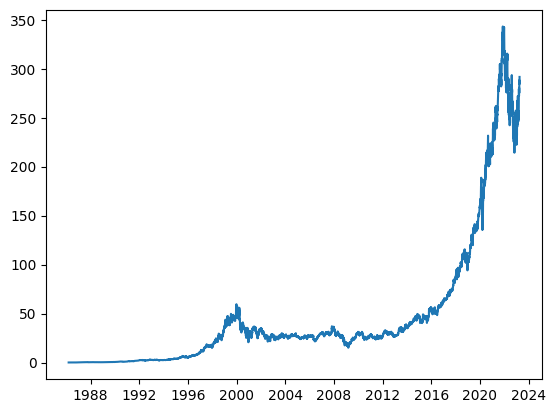

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1.index, df1['Close'])

In [ ]:
import numpy as np

def df1_to_windowed_df1(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df1_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df1_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df1_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df1 = pd.DataFrame({})
  ret_df1['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df1[f'Target-{n-i}'] = X[:, i]

  ret_df1['Target'] = Y

  return ret_df1

# Start day second time around: '2021-03-25'
windowed_df1 = df1_to_windowed_df1(df1,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df1

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
def windowed_df1_to_date_X_y(windowed_dataframe):
  df1_as_np = windowed_dataframe.to_numpy()

  dates = df1_as_np[:, 0]

  middle_matrix = df1_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df1_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df1_to_date_X_y(windowed_df1)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

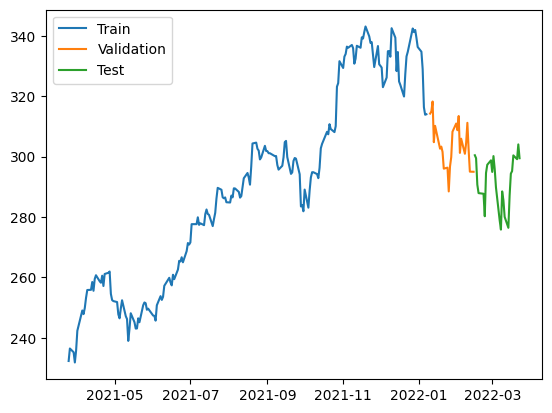

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 9s 120ms/step - loss: 84656.8359 - mean_absolute_error: 289.2186 - val_loss: 92331.0469 - val_mean_absolute_error: 303.7731
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 84414.0000 - mean_absolute_error: 288.7976 - val_loss: 92135.5391 - val_mean_absolute_error: 303.4511
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 84246.7891 - mean_absolute_error: 288.5074 - val_loss: 91964.1172 - val_mean_absolute_error: 303.1685
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 84047.3750 - mean_absolute_error: 288.1621 - val_loss: 91687.2969 - val_mean_absolute_error: 302.7116
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 83752.3281 - mean_absolute_error: 287.6487 - val_loss: 91303.6875 - val_mean_absolute_error: 302.0773
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 83287.5781 - mean_absolute_error: 286.8380 - val_loss: 90

7/7 [==============================] - 2s 4ms/step


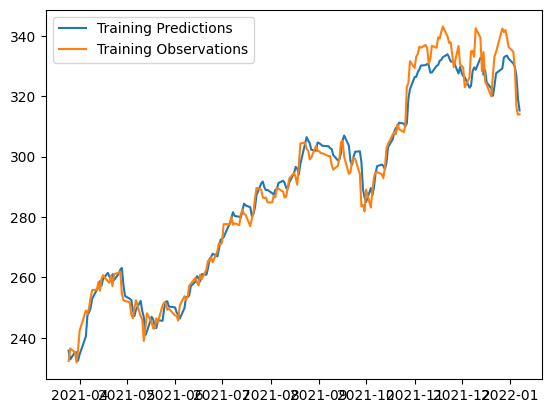

In [ ]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 66ms/step


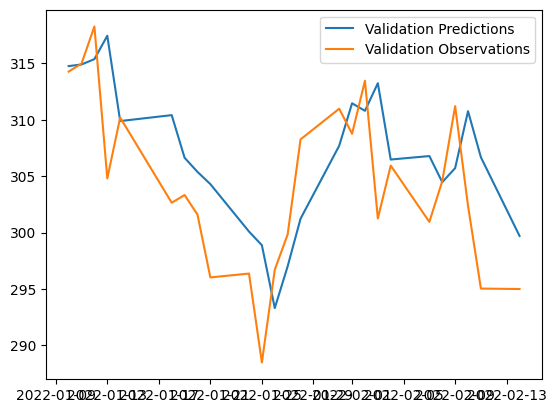

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 25ms/step


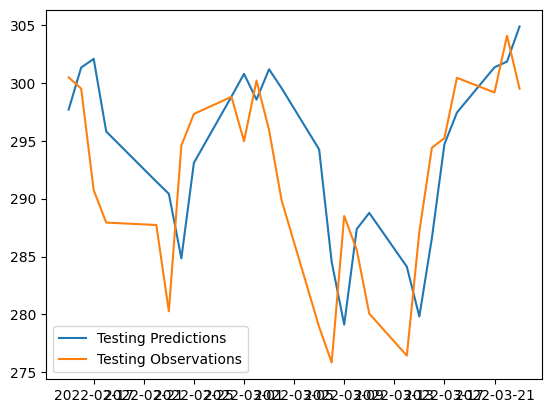

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

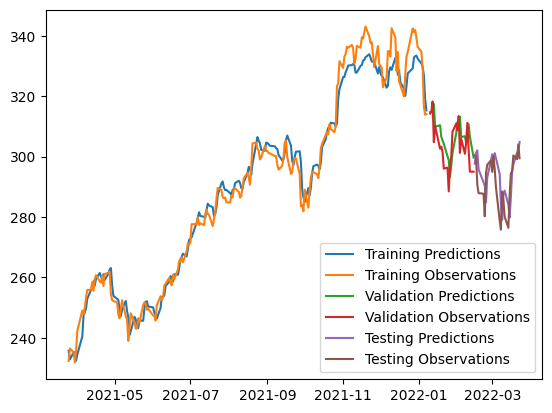

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 29ms/step


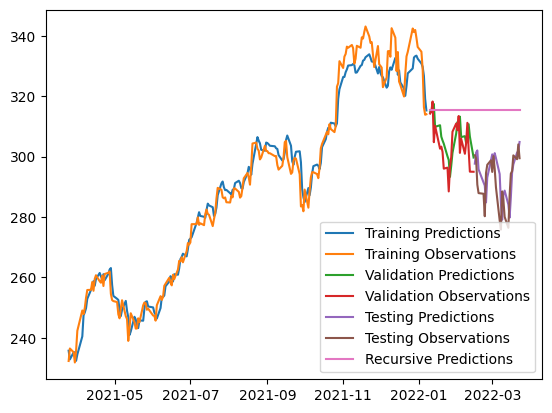

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])